In [16]:
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb

### Preprocess IMDB data

In [6]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [11]:
print(len(train_data), len(test_data))
print(train_data[0], len(train_data[0]))

25000 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 218


In [15]:
# trying to decode training data back to 
word_ids = imdb.get_word_index()  # map of word to ID
reverse_word_index = dict([(v, k) for k, v in word_ids.items()])
# decode first training point
decoded_review = " ".join(
    [reverse_word_index.get(i, '?') for i in train_data[0]]
)

print(decoded_review)

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have tw

In [20]:
# vectorize data
def vectorize_sequences(sequences, dimensions=10000):
    matrix = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            matrix[i, j] = 1.0

    return matrix

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

In [22]:
# separate a validation set -- first 10k/25k train points (40%)
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

### Build model

In [24]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [40]:
partial_X_train.shape

(15000, 10000)

In [25]:
history = model.fit(
    partial_X_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 1s 13ms/step - loss: 0.5325 - accuracy: 0.7851 - val_loss: 0.4095 - val_accuracy: 0.8652
Epoch 2/20
30/30 [==============================] - 0s 5ms/step - loss: 0.3278 - accuracy: 0.8986 - val_loss: 0.3486 - val_accuracy: 0.8606
Epoch 3/20
30/30 [==============================] - 0s 5ms/step - loss: 0.2425 - accuracy: 0.9219 - val_loss: 0.2959 - val_accuracy: 0.8829
Epoch 4/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1882 - accuracy: 0.9404 - val_loss: 0.2761 - val_accuracy: 0.8905
Epoch 5/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1538 - accuracy: 0.9493 - val_loss: 0.2909 - val_accuracy: 0.8857
Epoch 6/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1246 - accuracy: 0.9623 - val_loss: 0.3125 - val_accuracy: 0.8770
Epoch 7/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1066 - accuracy: 0.9683 - val_loss: 0.2980 - val_accuracy: 0.8843
Epoch 8/20
30/30 [=

**Visualizing training and validation loss curves**

In [30]:
import matplotlib.pyplot as plt

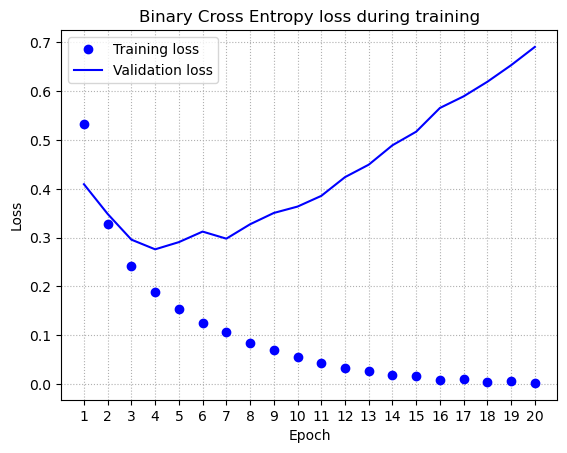

In [37]:
history_dict = history.history

train_loss_vals = history_dict['loss']
val_loss_vals = history_dict['val_loss']
epoch_vals = range(1, len(train_loss_vals)+1)   # loss was recorded every epoch anyway

plt.plot(epoch_vals, train_loss_vals, 'bo', label='Training loss')
plt.plot(epoch_vals, val_loss_vals, 'b', label='Validation loss')
plt.xticks(epoch_vals, epoch_vals)
plt.title('Binary Cross Entropy loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(ls=':')

plt.legend()
plt.show()

Note how the validation loss starts to increase after the 4th epoch, and then even more drastically after the 7th epoch. We are beginning to overfit the data at this point. **Solution**? Re-train the model but with four epochs only.